In [1]:
import pandas as pd

df = pd.read_csv('/content/weather_forecast.csv')#https://archive.ics.uci.edu/dataset/43/haberman+s+survival
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [2]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

In [3]:
df.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    ax = sns.countplot(x=df[i],data=df)
    plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder
# for i in df.columns:
#   if df[i].dtype == object:
#     df[i] = LabelEncoder().fit_transform(df[i])
# df

lb1 = LabelEncoder()
df['Outlook'] = lb1.fit_transform(df['Outlook'])
lb2 = LabelEncoder()
df['Temperature'] = lb2.fit_transform(df['Temperature'])
lb3 = LabelEncoder()
df['Humidity'] = lb3.fit_transform(df['Humidity'])
lb4 = LabelEncoder()
df['Windy'] = lb4.fit_transform(df['Windy'])
lb5 = LabelEncoder()
df['Play'] = lb5.fit_transform(df['Play'])
df

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [5]:
df.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.071429,1.142857,0.500000,0.571429,0.642857
std,0.828742,0.864438,0.518875,0.513553,0.497245
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000,1.000000


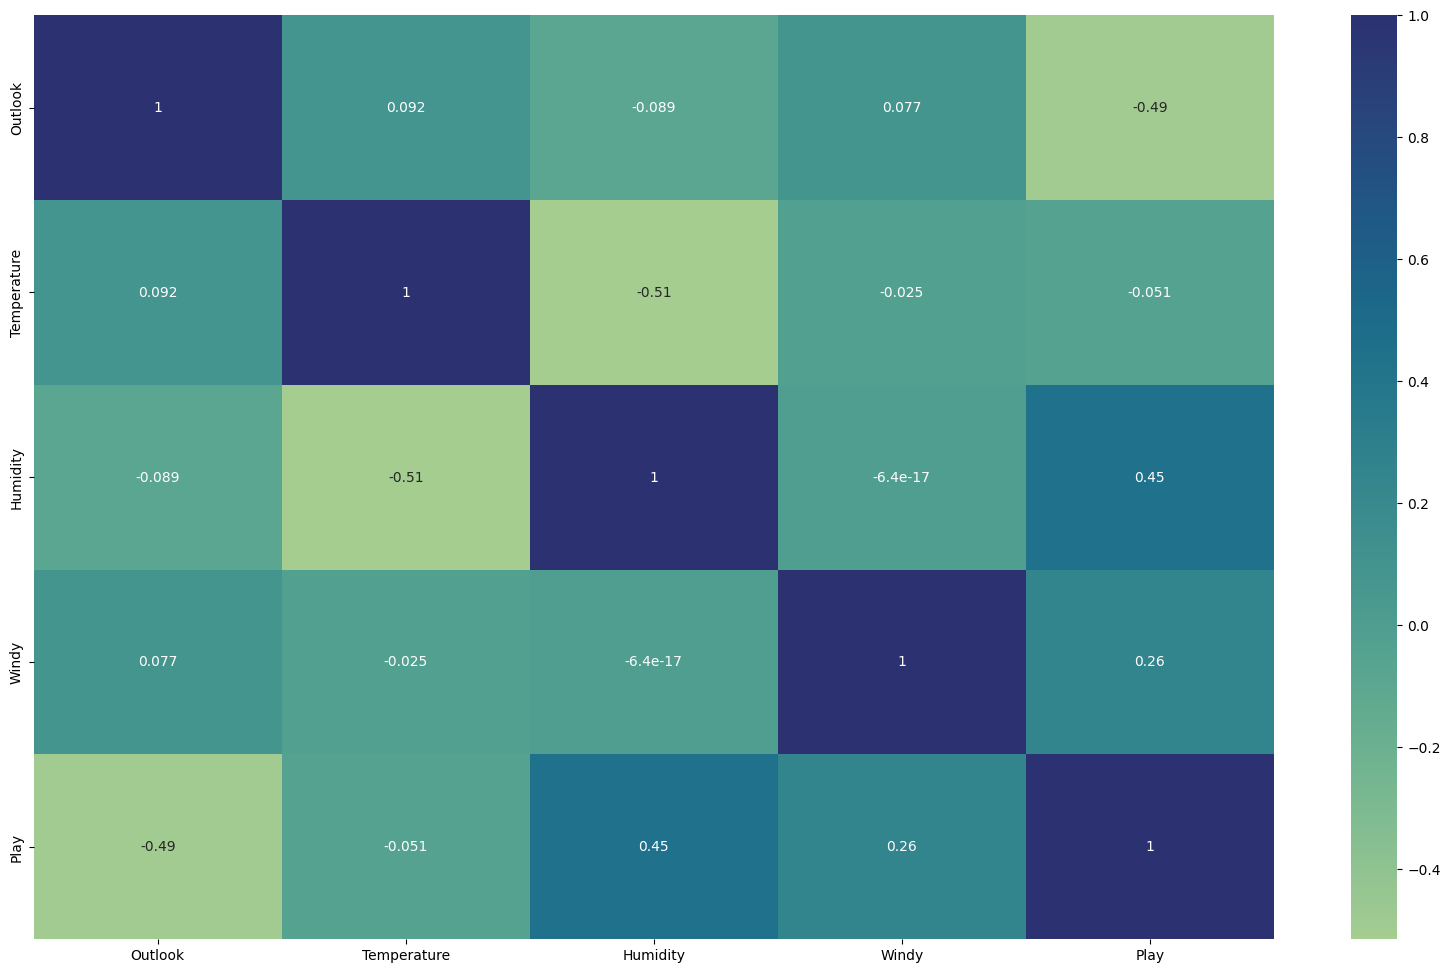

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap = 'crest', annot = True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x = df.drop('Play', axis = 1) #Features
y = df['Play'] #Target

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size= 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = []
for neighbors in range(1,11):
    knn_model = KNeighborsClassifier(n_neighbors = neighbors)
    knn_model.fit(x_train, y_train)

    knn_pred = knn_model.predict(x_test)
    accuracy.append(accuracy_score(y_test, knn_pred))
    print(f'Number of neighbors = {neighbors} \tAccuracy = {accuracy[neighbors-1]*100:.2f} %')

Number of neighbors = 1 	Accuracy = 66.67 %
Number of neighbors = 2 	Accuracy = 66.67 %
Number of neighbors = 3 	Accuracy = 100.00 %
Number of neighbors = 4 	Accuracy = 66.67 %
Number of neighbors = 5 	Accuracy = 66.67 %
Number of neighbors = 6 	Accuracy = 100.00 %
Number of neighbors = 7 	Accuracy = 66.67 %
Number of neighbors = 8 	Accuracy = 66.67 %
Number of neighbors = 9 	Accuracy = 66.67 %
Number of neighbors = 10 	Accuracy = 66.67 %


Text(0, 0.5, 'Accuracy')

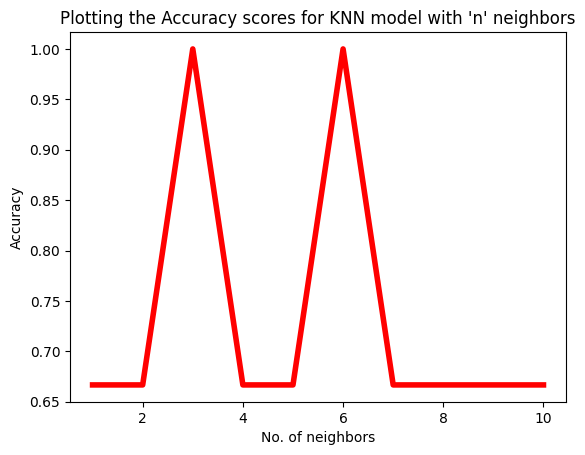

In [11]:
plt.plot(range(1,11), accuracy, label = 'Accuracy', color = 'red', lw = 4)
plt.title('Plotting the Accuracy scores for KNN model with \'n\' neighbors')
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy')

In [12]:
clf1 = KNeighborsClassifier(n_neighbors = 6,p=1)#manhattan

In [13]:
print(x_train)

    Outlook  Temperature  Humidity  Windy
12        0            1         1      1
5         1            0         1      0
8         2            0         1      1
2         0            1         0      1
1         2            1         0      0
13        1            2         0      0
4         1            0         1      1
7         2            2         0      1
10        2            2         1      0
3         1            2         0      1
6         0            0         1      0


In [14]:
clf1.fit (x_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [15]:
pred1 = clf1.predict(x_test)

In [16]:
cm1 = confusion_matrix(y_test,pred1)

In [17]:
print(cm1)

[[1 0]
 [0 2]]


In [18]:
cl1 = classification_report(y_test,pred1)

In [19]:
print(cl1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



##  Naive Bayes

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

clf1 = MultinomialNB()
clf2 = BernoulliNB()

In [21]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

BernoulliNB()

In [22]:
pred1 = clf1.predict(x_test)
pred2 = clf2.predict(x_test)

In [23]:
cm1 = confusion_matrix(y_test,pred1)
cr1 = classification_report(y_test,pred1)

cm2 = confusion_matrix(y_test,pred2)
cr2 = classification_report(y_test,pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


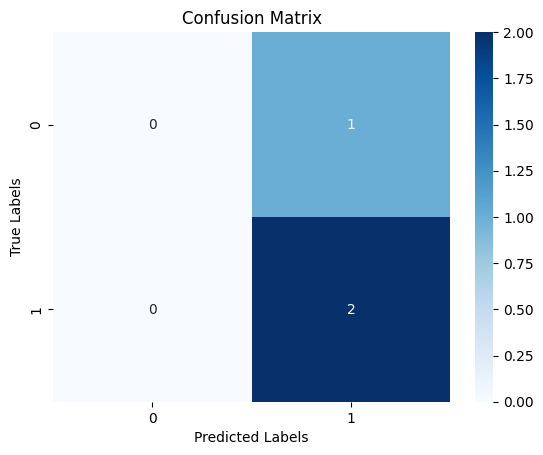

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [25]:
print(cr1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



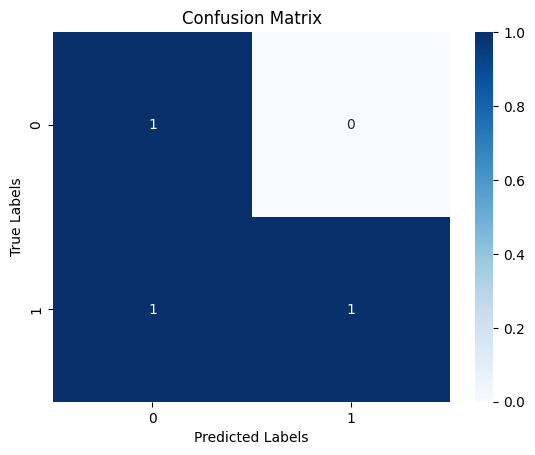

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [27]:
print(cr2)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [28]:
from sklearn.metrics import accuracy_score #works

prior1 = [x/100 for x in range(60,150,5)]
prior2 = [x/100 for x in range(60,150,5)]
best_accuracy = 0.0

best_val1 = None
best_val2 = None

for val2 in prior2:
    for val1 in prior1:
        clf = BernoulliNB(class_prior=[val1, val2])
        clf.fit(x_train, y_train)

        y_pred = clf.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_val1 = val1
            best_val2 = val2

print("Best Accuracy:", best_accuracy)
print("Best val1:", best_val1)
print("Best val2:", best_val2)

Best Accuracy: 1.0
Best val1: 0.75
Best val2: 1.35


In [29]:
clf3 = MultinomialNB(class_prior = [1,1.2])
clf4 = BernoulliNB(class_prior = [1,1.2])

In [30]:
clf3.fit(x_train,y_train)
clf4.fit(x_train,y_train)

pred3 = clf3.predict(x_test)
pred4 = clf4.predict(x_test)

cm3 = confusion_matrix(y_test,pred3)
cr3 = classification_report(y_test,pred3)

cm4 = confusion_matrix(y_test,pred4)
cr4 = classification_report(y_test,pred4)

In [31]:
print(cr3)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [32]:
print(cr4)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



## SVM Model

In [33]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [x/100 for x in range(10,200,5)],
    'max_iter': [x for x in range(1000,5000,1000)],
    'penalty': ['l1','l2']
    #random_state : [x for x in range(1,100)]
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
760 fits failed out of a total of 1520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [1.         0.66666667 0.66666667 0.66666667 1.        ]
Mean score: 0.7999999999999999


## Decision Tree

In [36]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [37]:
# use the model to make predictions with the test data
y_pred = dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))



Misclassified samples: 0
Accuracy: 1.00


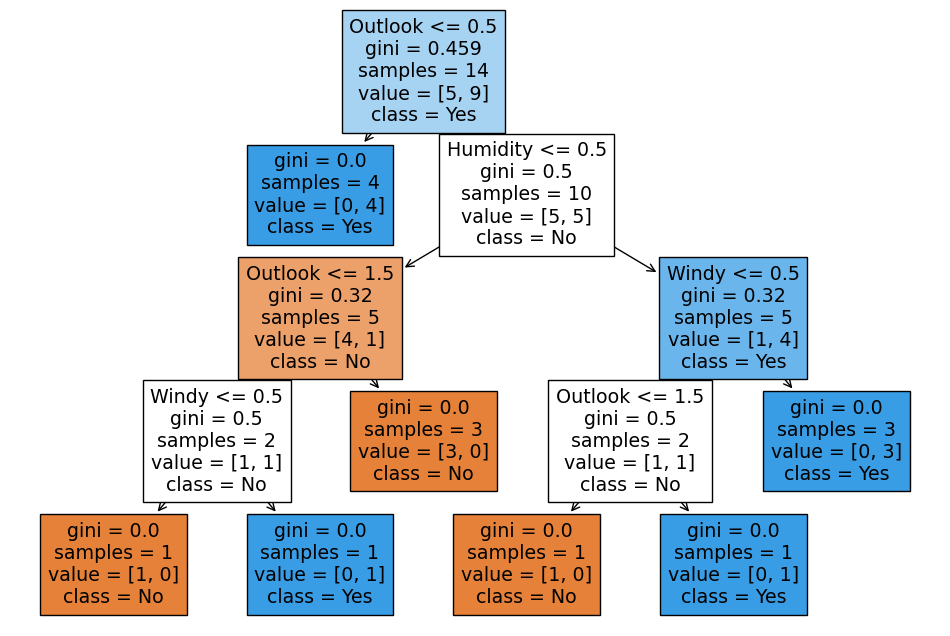

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming you have your data in 'x' (features) and 'y' (target/labels)

# Create an instance of the DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(x, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names=[str(x) for x in list(lb5.classes_)], filled=True)
plt.show()
